<a href="https://colab.research.google.com/github/oreushka/SIA_lab/blob/main/Month2_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Используйте метод K-средних и метод DBSCAN на самостоятельно сгенерированной выборке с количеством кластеров не менее 4. Для увеличения числа кластеров при генерации можно задать количество центров в функции make_blobs через параметр centers.
2.   Используйте эти же два метода на датасете [Mall_Customers](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python).
3.   Для каждого метода необходимо построить график.


In [ ]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

In [ ]:
#генерация данных
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=240, random_state=1, centers = 4)

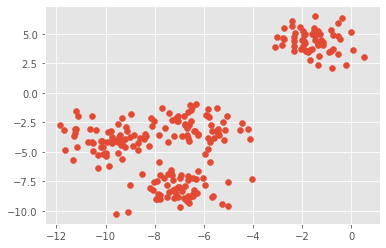

In [ ]:
#Визуализируем сгенерированные данные
plt.figure(1)
plt.scatter(X[:,0], X[:,1])

In [ ]:
#Метод К-средних
#Разобьём на 4 кластера
from sklearn.cluster import KMeans
kmeansModel = KMeans(n_clusters=4)

In [ ]:
#Обучим модель
kmeansModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Определим метки разбиение по кластерам и выведем их
labels = kmeansModel.labels_
print(labels)

[1 2 3 0 2 2 1 0 3 2 3 3 2 3 2 3 0 1 1 0 0 2 2 3 2 2 1 3 2 0 0 0 1 0 2 3 1
 2 1 0 1 0 3 1 1 3 2 1 0 3 0 2 2 0 1 3 1 1 0 0 3 3 3 3 2 1 0 3 2 1 2 1 2 1
 1 2 2 0 1 1 1 0 2 3 3 3 3 1 0 1 2 1 3 0 3 3 2 1 2 0 2 3 2 3 0 1 2 3 0 2 2
 2 0 1 2 3 1 2 1 2 0 0 2 0 1 0 1 3 0 3 3 3 3 1 1 0 3 1 0 0 2 2 0 2 2 2 1 1
 1 2 1 2 3 2 1 2 3 3 2 2 0 1 2 1 1 0 3 0 3 1 3 0 2 3 1 1 3 3 3 2 2 2 3 0 0
 0 1 0 0 1 2 0 1 0 2 2 2 3 0 3 3 3 3 1 1 1 2 0 2 3 3 1 0 0 2 3 2 0 0 3 0 0
 1 1 1 3 1 1 1 3 2 0 0 3 0 0 0 0 0 1]


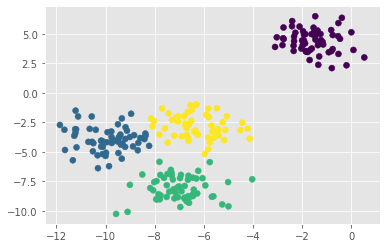

In [ ]:
#Визуализируем разбиение на кластеры
plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=labels)

In [ ]:
#Сделаем проверку на количество кластеров с помощью метода локтя
#Вычислим значение критерия k-means и выведем его
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
print(criteries)

[1794.2232567644132, 856.6084556486994, 432.9326424939411, 383.42877211460257, 345.1482553631348, 302.1153403715613, 268.63383041484656, 231.49252268590251]


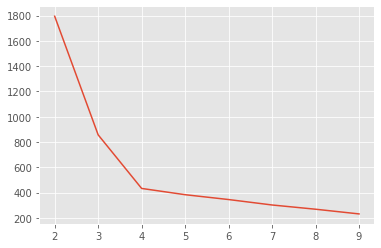

In [ ]:
#Построим на графике метод локтя
plt.figure(3)
plt.plot(range(2,10), criteries)

In [ ]:
#DBSCAN
#импортируем DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
#Проведем кластеризацию
clustering = DBSCAN(eps=0.7145, min_samples=7).fit_predict(X)
print(clustering)

[ 0  1  2  3  1 -1  0  3  0  1  2  2  1  2  1  2  3  0  0  3  3  1  1  2
  1 -1 -1 -1 -1 -1  3  3  0  3  1  2  0  1 -1  3  0  3 -1  0  0  2 -1 -1
  3  2  3 -1  1  3  0 -1  0 -1  3  3  2  0  2 -1  1  0  3  2 -1  0  1  0
 -1 -1  0  1  1  3  0 -1  0 -1  1  2  2  2  2  0  3  0  1 -1  2  3  2 -1
  1 -1  1  3  1  2  1  2  3  0 -1  2  3  1  1  1  3  0  1  2  0  1  0  1
  3  3  1 -1  0  3  0  2  3  2  2  2  2  0  0  3  2  0  3  3  1  1  3  1
  1  1  0 -1  0  1 -1  1 -1  1  0  1  2  2  1  1  3  0  1 -1  0  3  2  3
  2  0  2  3  1  2  0  0  2  2  2  1  1  1  2 -1  3  3  0  3  3  0  1  3
 -1  3 -1  1  1  2  3 -1  2  2  2 -1  0  0  1  3 -1  2  2 -1 -1  3  1  2
  1  3  3  2  3 -1  0 -1  0 -1  0  0  0  2  1  3  3 -1 -1  3  3 -1  3 -1]


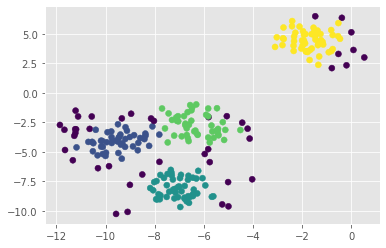

In [ ]:
#Выведем кластеры
plt.scatter(X[:,0], X[:,1], c=clustering)

In [ ]:
#импортируем датасет
from google.colab import drive
drive.mount('/content/drive')
customers = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#k-means with dataset Mall_Customers
#Выгрузим 2 столбца из датасета
X = customers[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values

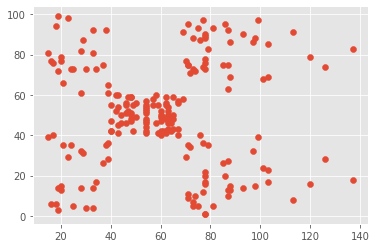

In [ ]:
#Визуализируем импортированные данные
plt.figure(1)
plt.scatter(X[:,0], X[:,1])

In [ ]:
#Обучим модель
kmeansModel = KMeans(n_clusters=6)
kmeansModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#Определим метки разбиение по кластерам и выведем их
labels = kmeansModel.labels_
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 5 2 5 2
 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5]


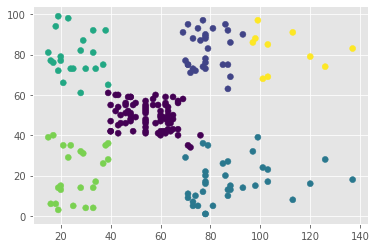

In [ ]:
#Визуализируем разбиение на кластеры
plt.figure(2)
plt.scatter(X[:,0], X[:,1], c=labels)

In [ ]:
#Сделаем проверку на количество кластеров с помощью метода локтя
#Вычислим значение критерия k-means и выведем его
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=3)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
print(criteries)

[181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37265.86520484347, 30259.65720728547, 25022.485004530354, 22842.004653460128]


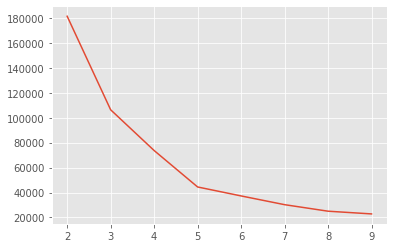

In [ ]:
#Построим на графике метод локтя
plt.figure(3)
plt.plot(range(2,10), criteries)

Оптимально - 5 кластеров, но мне не понравилось, поэтому оставим 6

In [ ]:
#DBSCAN with dataset Mall_Customers
#Проведем кластеризацию
clustering = DBSCAN(eps=11.0, min_samples=9).fit_predict(X)
print(clustering)

[-1  0  1  0 -1  0  1 -1  1  0  1 -1 -1  0  1  0 -1  0 -1 -1 -1  0  1  0
  1  0  2  2  2  0  1  0  1 -1 -1  0 -1  0  2  2  2 -1  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  2  3  2  3  4  3  4  3  2  3  4  3  4  3  4  3  4  3  2  3
  4  3  2  3  4  3  4  3  4  3  4  3  4  3  4  3  2  3  4  3  4  3  4  3
  4 -1  4  3  4  3  4  3  4  3  4  3 -1  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


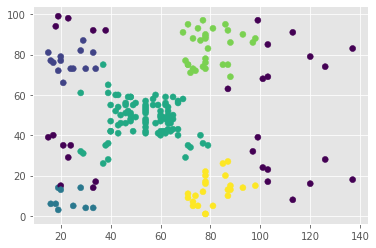

In [ ]:
#Выведем кластеры
plt.scatter(X[:,0], X[:,1], c=clustering)